
# Titanic

In [1]:
import pandas as pd #import pandas for dataframe
import matplotlib.pyplot as plt #import matplotlib for data visualigation
#this is an magic function
%matplotlib inline 

import seaborn as sns  #import seaborn for data visualigation
sns.set()

In [2]:
train =pd.read_csv("Titanic_dataset/train.csv")  #read train dataset and store in train variable
test =pd.read_csv("Titanic_dataset/test.csv")  #read test dataset and store in test variable


In [3]:
train.head(5)   #it will show train dataset 1st five row

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(5)     #it will show test dataset 1st five row

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape      #it will show the shape of train dataset

(891, 12)

In [6]:
test.shape        #it will show the shape of train dataset

(418, 11)

In [7]:
train.info()   #it will show the info of train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()     #it will show the info of test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
train.isnull().sum()    # "Age cabin and Embarked -> data missing" 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()     # Age cabin and Fare -> data missing

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#this bar_chart is for create bar chart 
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']

    df.plot(kind = 'bar')

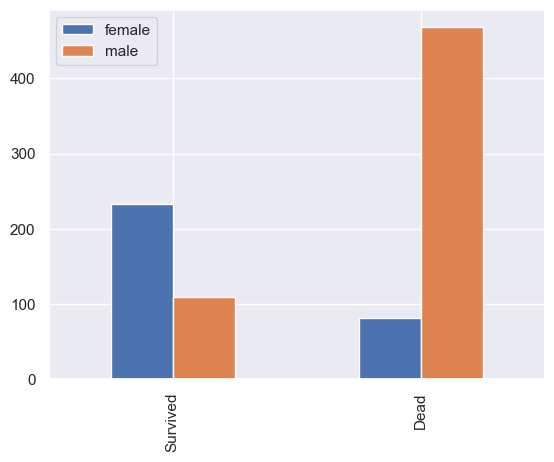

In [12]:
#bar_chart function call to see bar graph 
bar_chart('Sex')


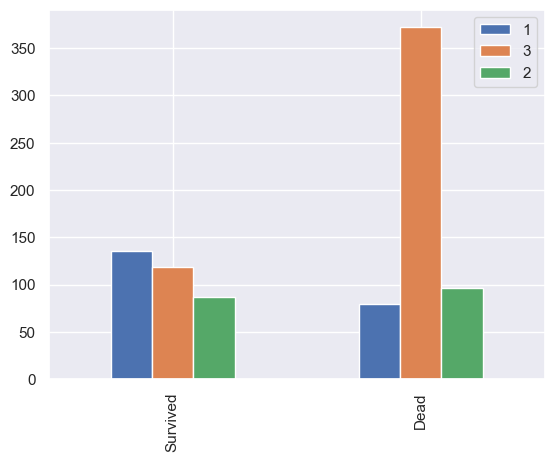

In [13]:
bar_chart('Pclass')

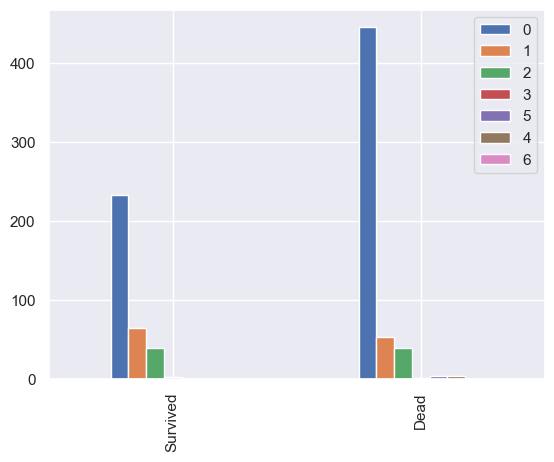

In [14]:
bar_chart("Parch")

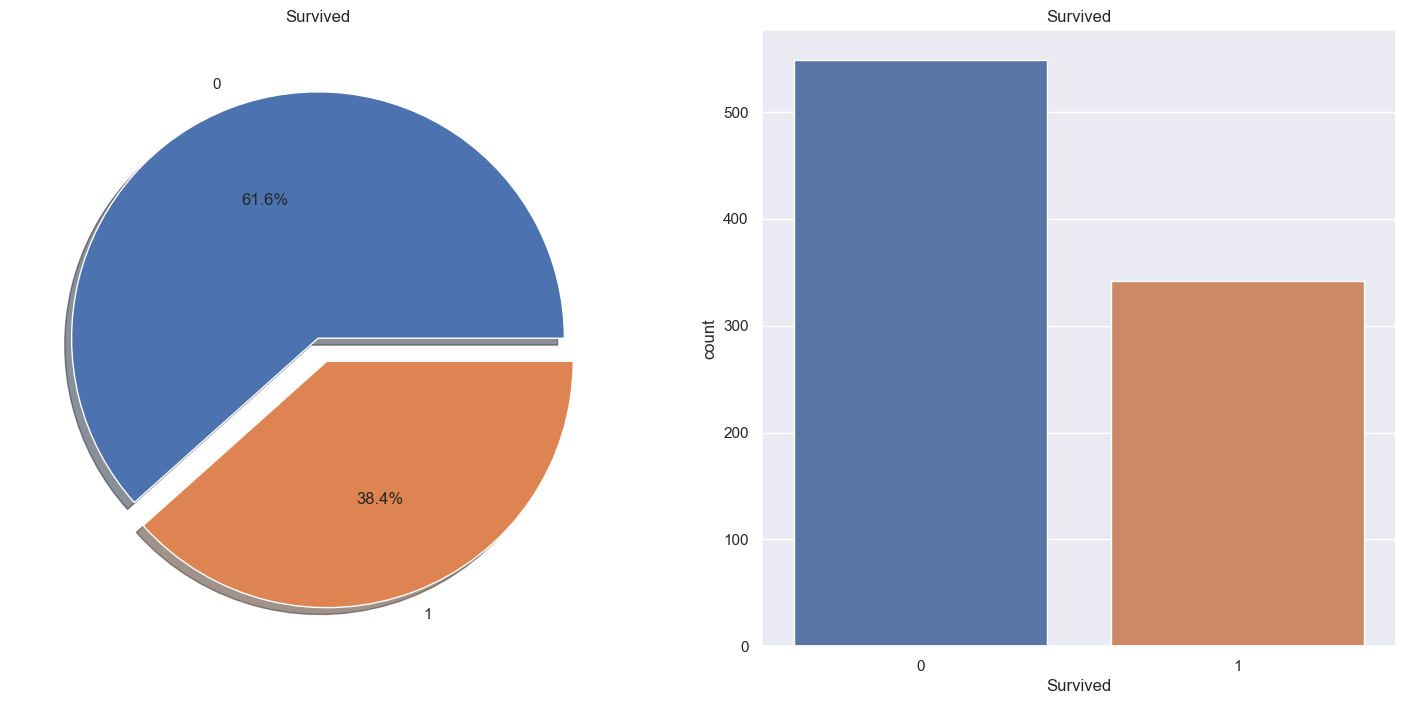

In [15]:
#this code is for pie chart , there is no function declair


f,ax = plt.subplots(1, 2, figsize=(18, 8))
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
Survived_num = train['Survived'].astype('float')

#sns.countplot(Survived_num, ax = ax[1] )

sns.countplot(data=train,x='Survived', ax = ax[1])
ax[1].set_title('Survived')
plt.show()


In [16]:
# ordinal
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


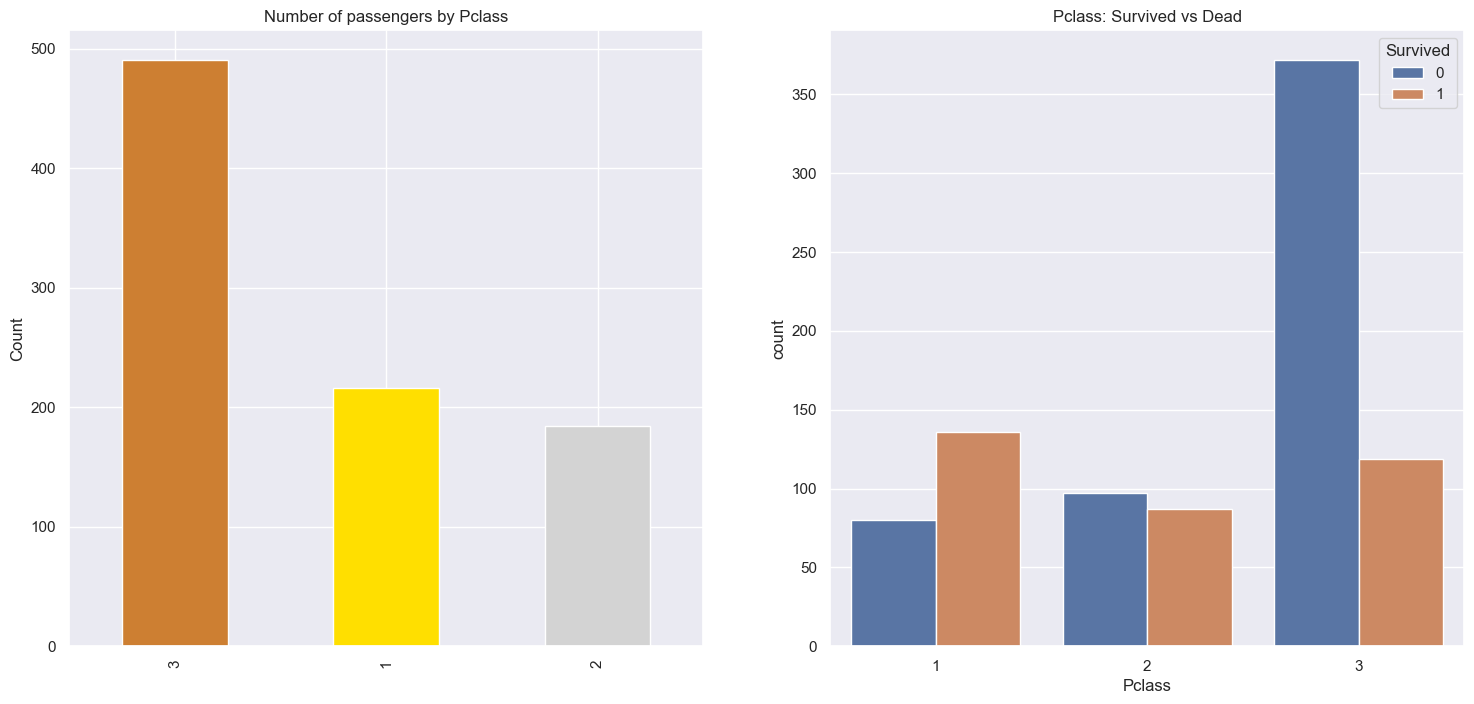

In [17]:

f, ax = plt.subplots(1, 2, figsize=(18, 8))

train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot( data=train,x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()



In [18]:
pd.crosstab([train.Sex,train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r') 

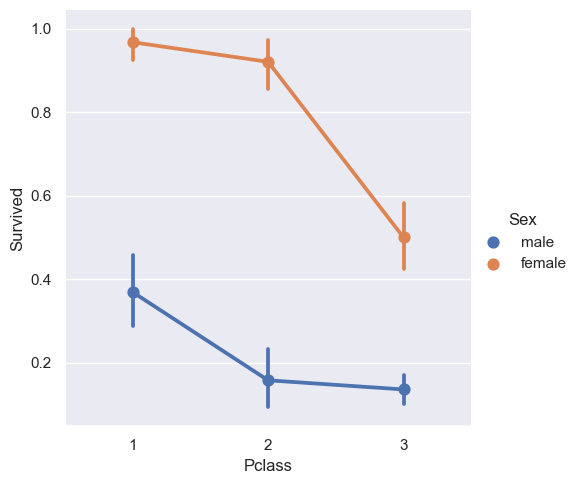

In [19]:
# Old code using factorplot ```sns.factorplot(x='x_data', y='y_data', data=df)```

# Updated code using catplot ```sns.catplot(x='x_data', y='y_data', data=df)```
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=train)
plt.show()

In [20]:
#continuous

In [21]:
print(f"Oldest:{train['Age'].max()}\nYoungest:{train['Age'].min()}\nAvarage:{train['Age'].mean()}")


Oldest:80.0
Youngest:0.42
Avarage:29.69911764705882


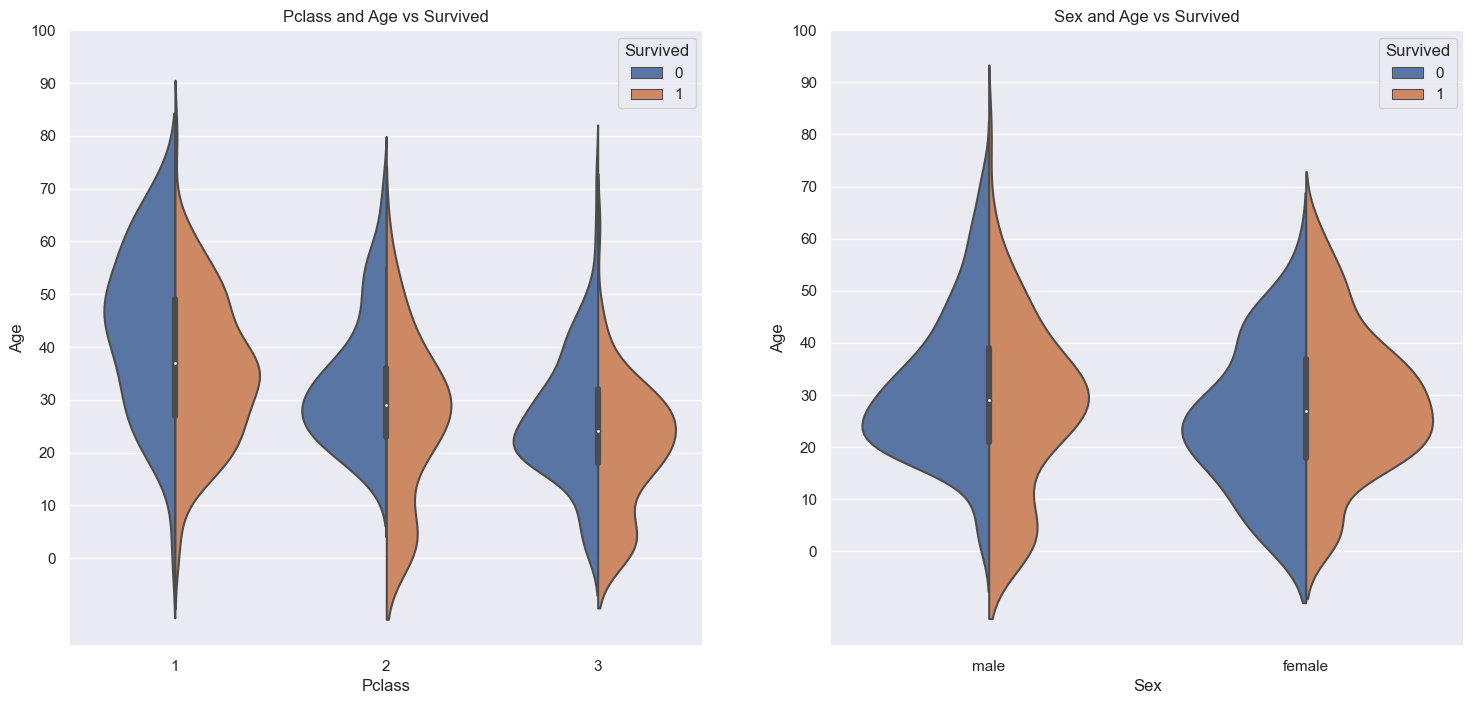

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass',y='Age', hue='Survived',data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x='Sex',y='Age', hue='Survived',data=train,split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Feature Engineering


In [23]:
train_test = [train, test]

for d in train_test:
   
    d['Title'] = d['Name'].str.extract('([A-Za-z]+)\.', expand=False)


In [24]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [25]:
# Mapping
title_mapping = {'Mr':0,'Miss':1 , 'Mrs':2 , 'Master':3 , 'Dr':3 , 'Rev':3 , 'Mlle':3 , 'Major':3 , 'Col':3, 'Countess':3, 'Capt':3, 'Ms':3, 'Sir':3, 'Lady':3, 'Mme':3, 'Don':3, 'Jonkheer':3}
for d in train_test:
    d['Title'] = d['Title'].map(title_mapping)

In [26]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


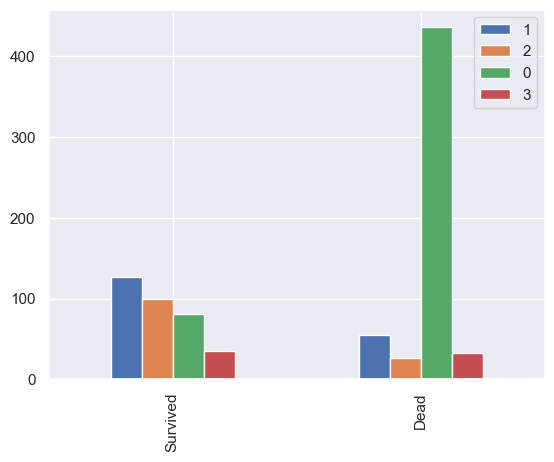

In [27]:
bar_chart('Title')

In [28]:
train.drop('Name', axis= 1, inplace= True)
test.drop('Name', axis= 1, inplace= True)
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


## missing value


In [29]:
grouping = train.groupby("Title")["Age"]

train["Age"].fillna(grouping.transform("mean"), inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

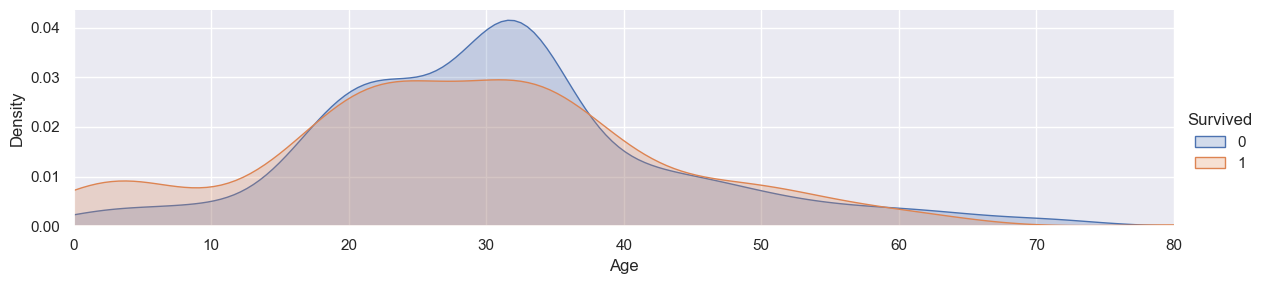

In [31]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True) # if i replace fill by shade it will gives an error in future version
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

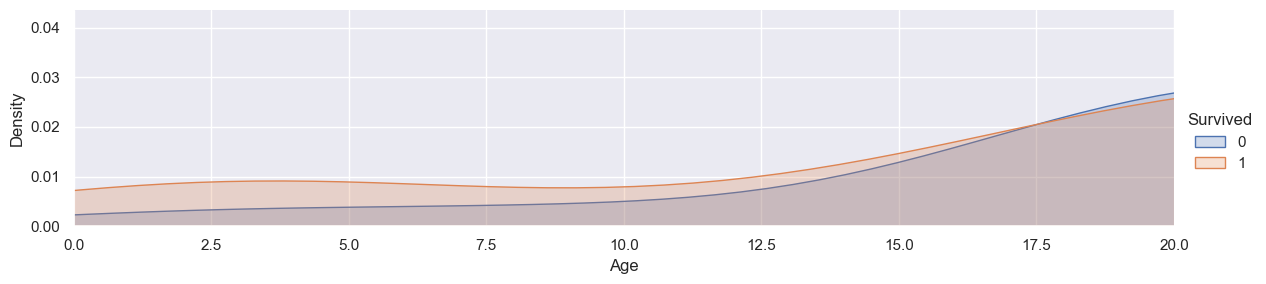

In [32]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True) # if i replace fill by shade it will gives an error in future version
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

In [33]:
for dataset in train_test:
    dataset.loc[dataset['Age']<= 16,'Age'] = 5
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']= 1
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age']= 2
    dataset.loc[(dataset['Age']>36)& (dataset['Age']<=62),'Age']= 3
    dataset.loc[dataset['Age']>16,'Age']= 4

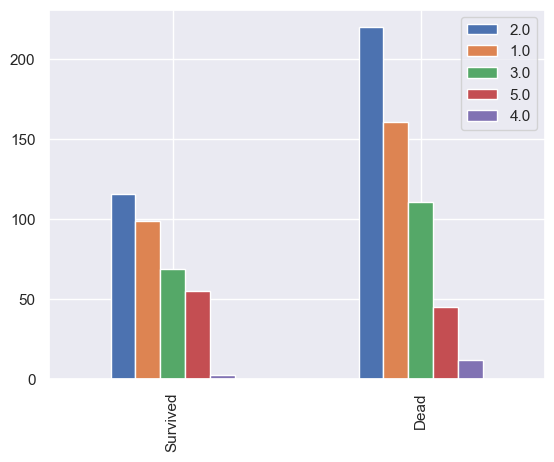

In [34]:
bar_chart('Age')

In [35]:
p1 = train[train['Pclass']==1]['Embarked'].value_counts()
p2 = train[train['Pclass']==2]['Embarked'].value_counts()
p3 = train[train['Pclass']==3]['Embarked'].value_counts()

classes = pd.DataFrame([p1,p2,p3])
classes.index=['1','2','3']
classes.head()

,S,C,Q
1,127,85,2
2,164,17,3
3,353,66,72


<Axes: >

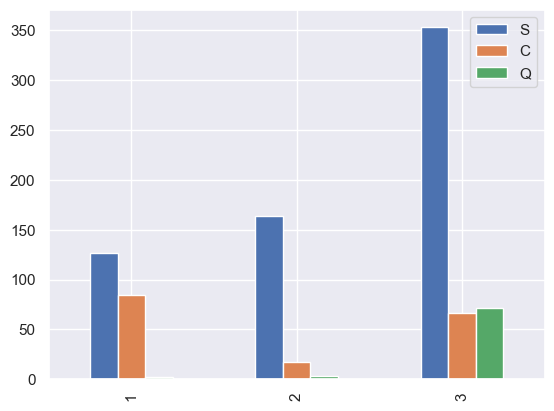

In [36]:
classes.plot(kind='bar', stacked=False)  #stacked= True will create oneline bar graph

In [37]:
  for d in train_test:
        d['Embarked']= d['Embarked'].fillna('S')
        

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [39]:
train.Embarked.isnull().sum()

0

In [40]:
embarked_mapping = {"S":0,"C":1,"Q":3}
for d in train_test:
    d['Embarked']=d['Embarked'].map(embarked_mapping)
train.Embarked

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    3
Name: Embarked, Length: 891, dtype: int64

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,0,0


In [42]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [43]:
for d in train_test:
    d['Cabin']= d['Cabin'].str[:1]

p1 = train[train['Pclass']==1]['Cabin'].value_counts()
p2 = train[train['Pclass']==2]['Cabin'].value_counts()
p3 = train[train['Pclass']==3]['Cabin'].value_counts()

Cabins = pd.DataFrame([p1,p2,p3])
Cabins.index=['1','2','3']
Cabins.head()

,C,B,D,E,A,T,F,G
1,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


<Axes: >

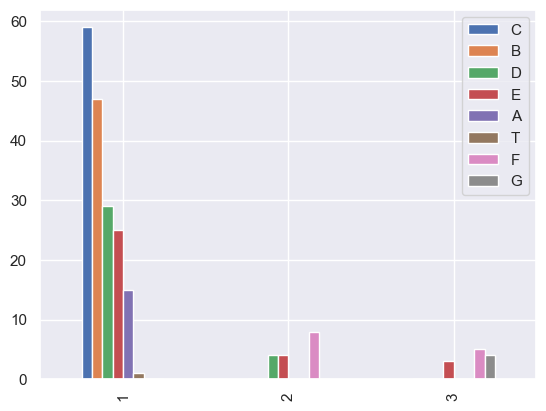

In [44]:
Cabins.plot(kind='bar' ,stacked = False)

In [45]:
cabin_mapping = {"A":0,"B":0.5,"C":1.0,"D":1.5,"E":2.0,"F":2.5,"G":3.0,"T":3.5}
for d in train_test:
    d['Cabin']=d['Cabin'].map(cabin_mapping)


In [46]:
grouping_class = train.groupby("Pclass")["Cabin"]

train['Cabin'].fillna(grouping.transform("median"), inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

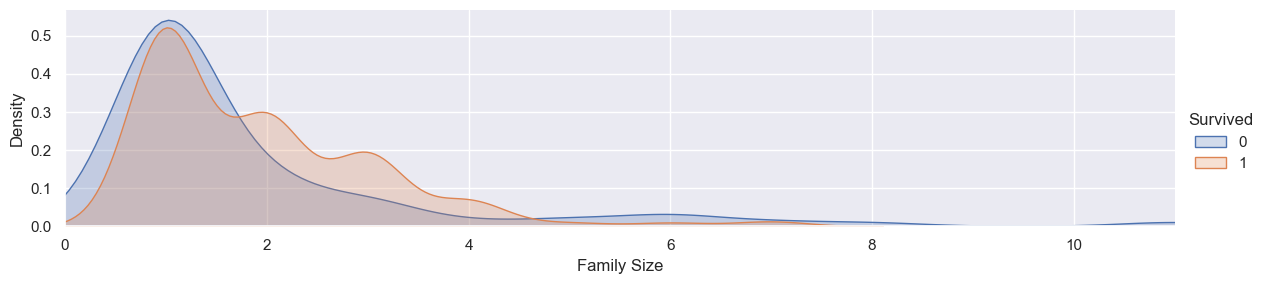

In [47]:
train["Family Size"] = train.SibSp + train.Parch +1

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Family Size',fill=True) # if i replace fill by shade it will gives an error in future version
facet.set(xlim=(0,train['Family Size'].max()))
facet.add_legend()

plt.show()

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,2.0,0,0,2
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,1.0,1,2,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,1
3,4,1,1,female,2.0,1,0,113803,53.1000,1.0,0,2,2
4,5,0,3,male,2.0,0,0,373450,8.0500,2.0,0,0,1


In [49]:
train['Family Size']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family Size, Length: 891, dtype: int64

In [50]:

family_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}

train['Family Size']= train['Family Size'].map(family_mapping)
    

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,2.0,0,0,0.4
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,1.0,1,2,0.4
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,0.0
3,4,1,1,female,2.0,1,0,113803,53.1000,1.0,0,2,0.4
4,5,0,3,male,2.0,0,0,373450,8.0500,2.0,0,0,0.0


In [52]:
train.drop(['PassengerId','Ticket','SibSp','Parch'], axis=1,inplace=True) #this line will run only one time. it will drop two axis, after run time the axis were not found,for that reason itshoes an errror
train.shape

(891, 9)

In [53]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family Size
0,0,3,male,1.0,7.2500,2.0,0,0,0.4
1,1,1,female,3.0,71.2833,1.0,1,2,0.4
2,1,3,female,1.0,7.9250,2.0,0,1,0.0
3,1,1,female,2.0,53.1000,1.0,0,2,0.4
4,0,3,male,2.0,8.0500,2.0,0,0,0.0


In [54]:
target = train.Survived
train.drop('Survived',axis = 1 ,inplace=True)

In [55]:
sex_mapping = {"male":0,"female":1}
train.Sex = train.Sex.map(sex_mapping)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    float64
 3   Fare         891 non-null    float64
 4   Cabin        891 non-null    float64
 5   Embarked     891 non-null    int64  
 6   Title        891 non-null    int64  
 7   Family Size  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


### Machine learning

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

In [59]:
#Decision Tree
clf_dt = DecisionTreeClassifier()
score=cross_val_score(clf_dt,train,target, cv=k_fold,scoring='accuracy')
score

array([0.77777778, 0.80898876, 0.80898876, 0.79775281, 0.80898876,
       0.80898876, 0.7752809 , 0.82022472, 0.74157303, 0.79775281])

In [60]:
import numpy as np

In [61]:
np.mean(score)*100

79.46317103620476

In [69]:
#Random Forest
clf_rf = RandomForestClassifier()
scores=cross_val_score(clf_rf,train,target, cv=k_fold,scoring='accuracy')
scores

array([0.76666667, 0.85393258, 0.82022472, 0.78651685, 0.84269663,
       0.80898876, 0.83146067, 0.80898876, 0.74157303, 0.78651685])

In [70]:
np.mean(scores)*100

80.47565543071163